In [1]:
%matplotlib inline
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

/Users/dbranton/miniconda3/envs/astroconda36/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# Tensorflow in Python

### Linear Regression (Non-eager execution)

Instructions for updating:
Use `tf.global_variables_initializer` instead.
20 [0.21950503] [0.23728143]
40 [0.13247068] [0.28631052]
60 [0.10904677] [0.29950595]
80 [0.1027426] [0.30305728]
100 [0.10104595] [0.30401304]
120 [0.10058933] [0.3042703]
140 [0.10046642] [0.30433953]
160 [0.10043333] [0.30435815]
180 [0.10042445] [0.3043632]
200 [0.10042205] [0.30436453]


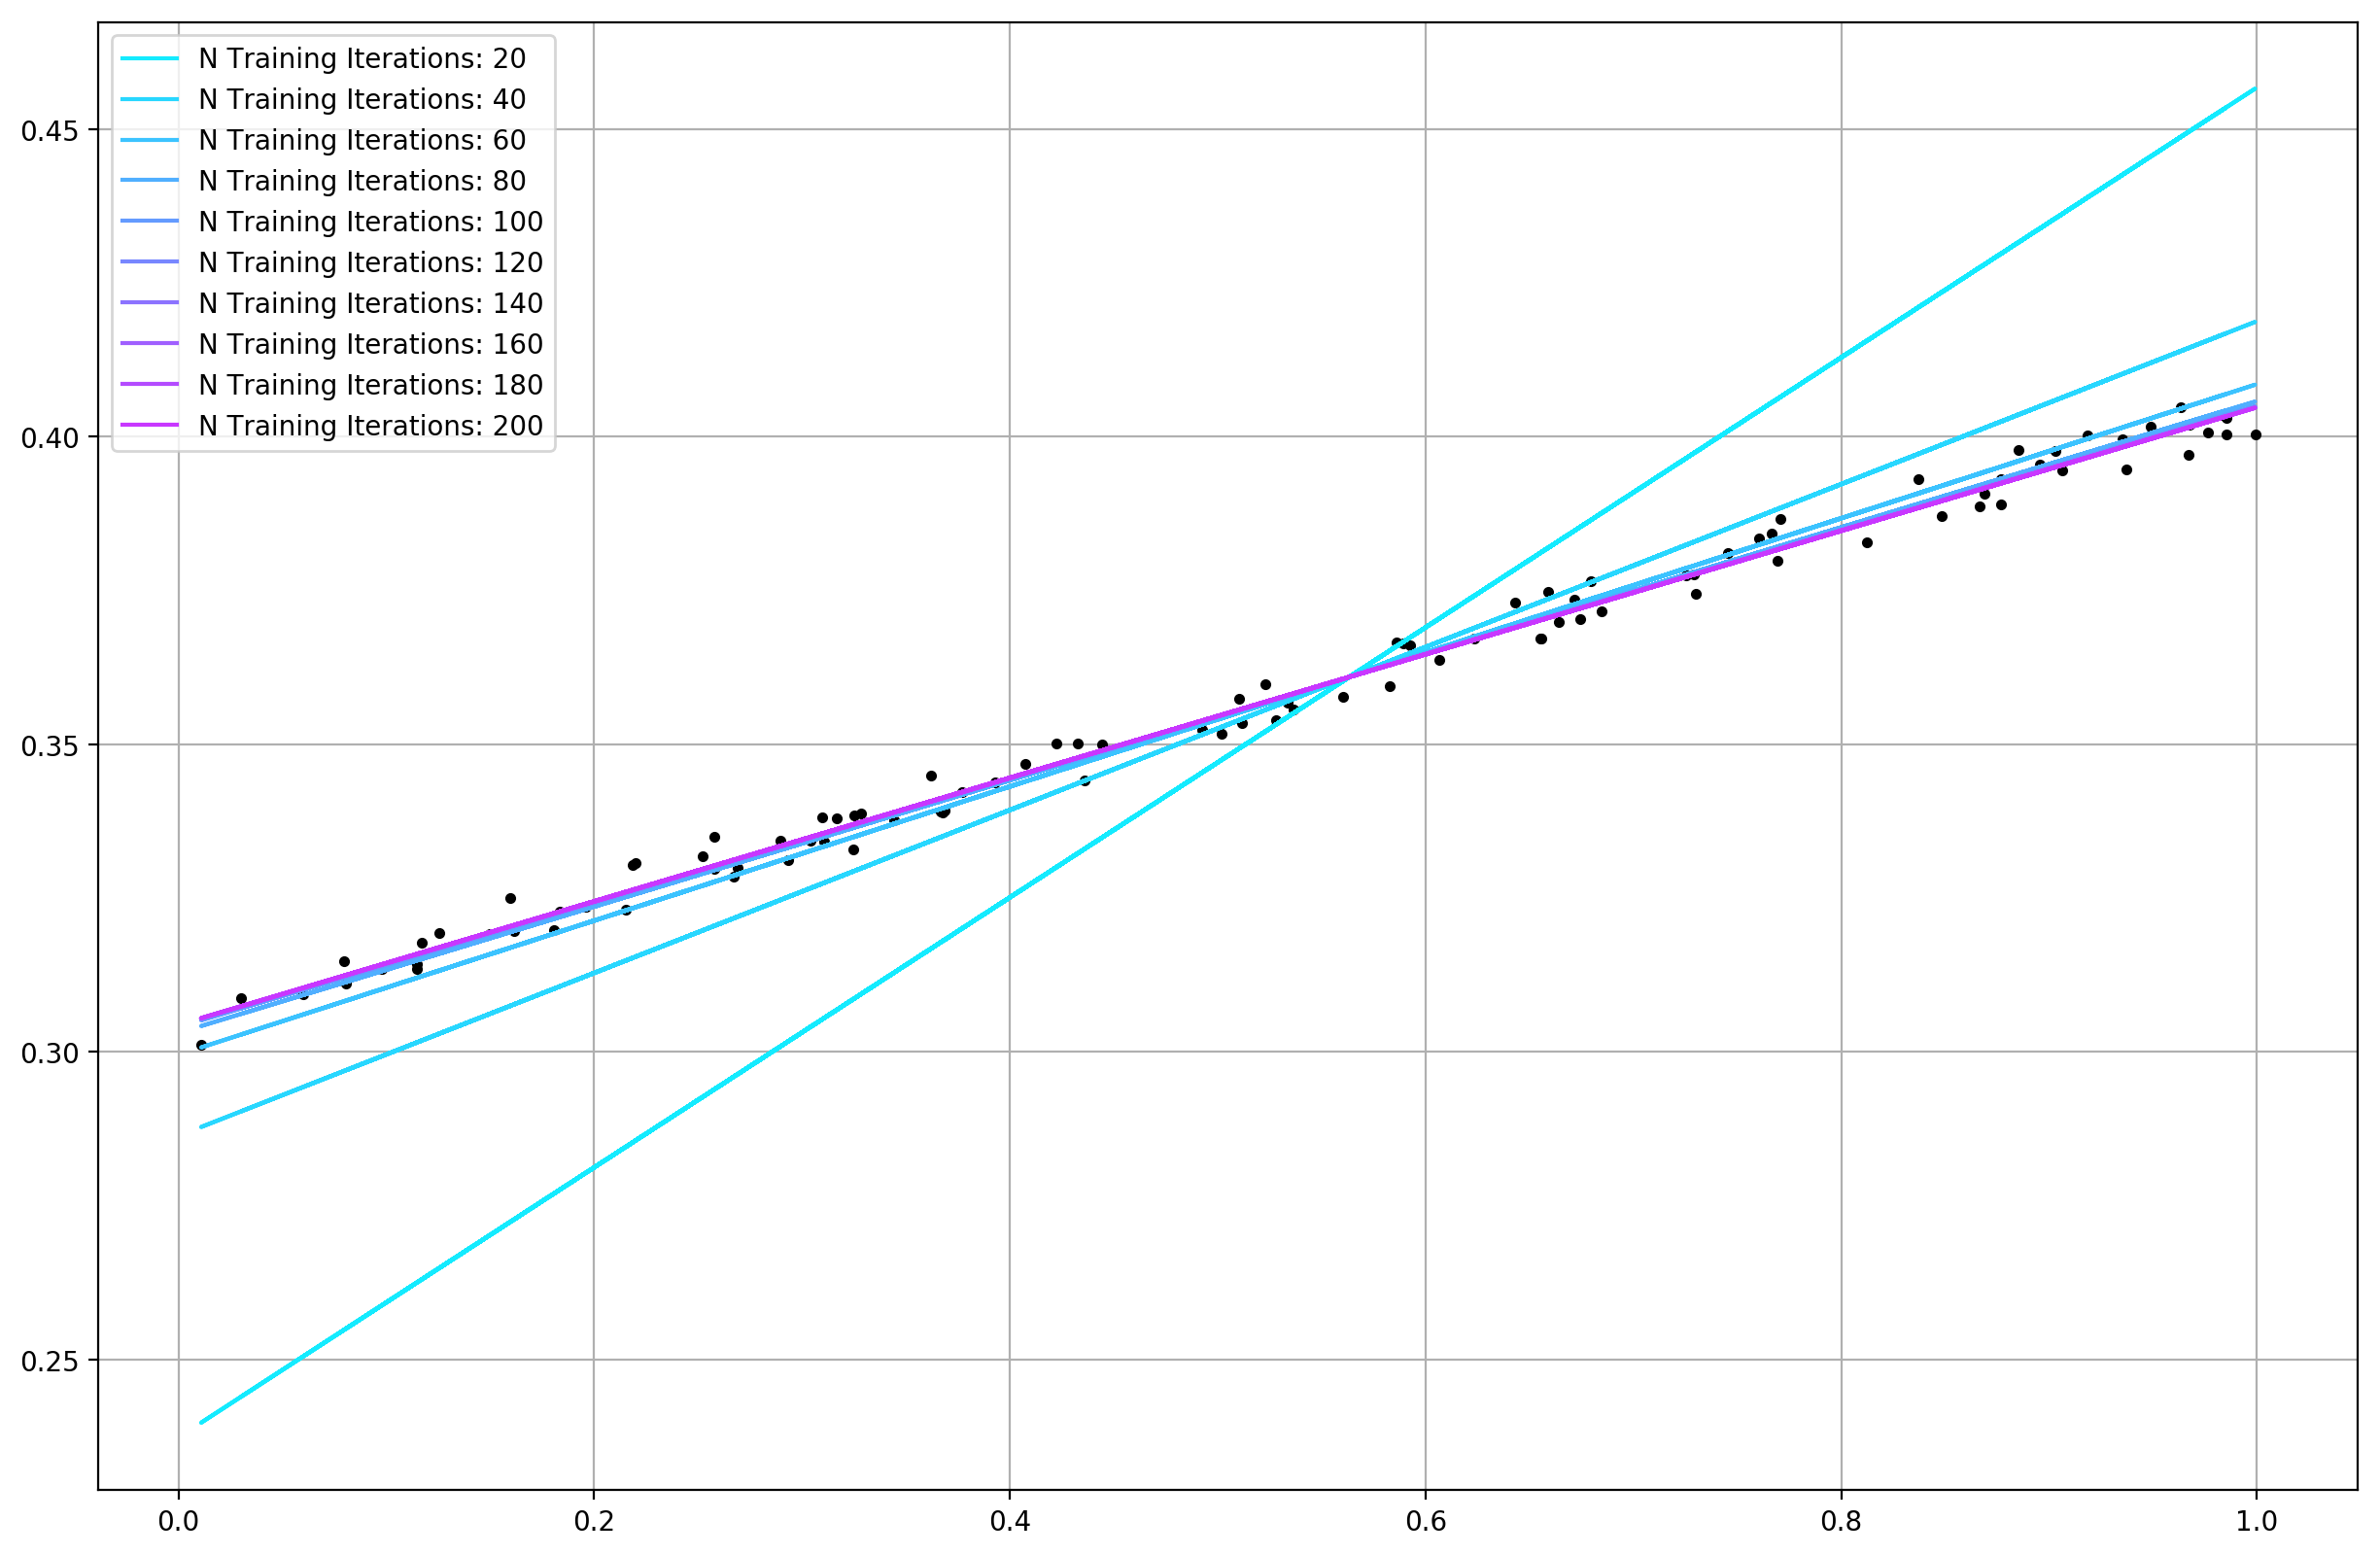

In [4]:
# Create 100 phony x, y data points in NumPy, y = x * 0.1 + 0.3
x_data = np.random.rand(100).astype(np.float32)
y_data = x_data * 0.1 + 0.3 + np.random.rand(100)/100 # Inject some noise

fig = plt.figure(figsize=(15,10))
fig.dpi = 200
plt.plot(x_data,y_data, '.', color = 'k')
plt.grid()
 
# Try to find values for W and b that compute y_data = W * x_data + b
# (We know that W should be 0.1 and b 0.3, but Tensorflow will
# figure that out for us.)
W = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
b = tf.Variable(tf.zeros([1]))
y = W * x_data + b
 
# Minimize the mean squared errors.
loss = tf.reduce_mean(tf.square(y - y_data))
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)
 
# Before starting, initialize the variables.  We will 'run' this first.
init = tf.initialize_all_variables()
 
# Launch the graph.
sess = tf.Session()
sess.run(init)
 
# Fit the line.
for step in range(201):
    sess.run(train)
    if step % 20 == 0 and step != 0:
        y_det = x_data * sess.run(W) + sess.run(b)
        print(step, sess.run(W), sess.run(b))
        plt.plot(x_data,y_det, color = plt.cm.cool(step), label = "N Training Iterations: {}".format(step))
        
        
plt.legend()